In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV

In [4]:
df=pd.read_csv('heart_disease.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [6]:
## missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
df['oldpeak'].mean()

0.8912529550827422

In [9]:
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].mean())
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.500000,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.000000,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.500000,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.891253,downsloping,reversable defect,4


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [12]:
cc=pd.get_dummies(df,dtype='int')
cc

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,restecg_st-t abnormality,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.300000,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,41,135,203,False,132,0.000000,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,57,140,192,False,148,0.400000,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0
3,52,118,186,False,190,0.000000,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
4,57,110,201,False,126,1.500000,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.500000,4,0,1,1,...,0,1,0,0,0,0,1,0,0,1
904,62,166,170,False,120,3.000000,4,0,1,1,...,1,0,1,0,0,1,0,1,0,0
905,56,170,0,False,123,2.500000,4,0,1,0,...,0,0,1,0,1,0,0,0,1,0
906,56,144,208,True,105,0.891253,4,0,1,0,...,1,0,0,1,1,0,0,0,0,1


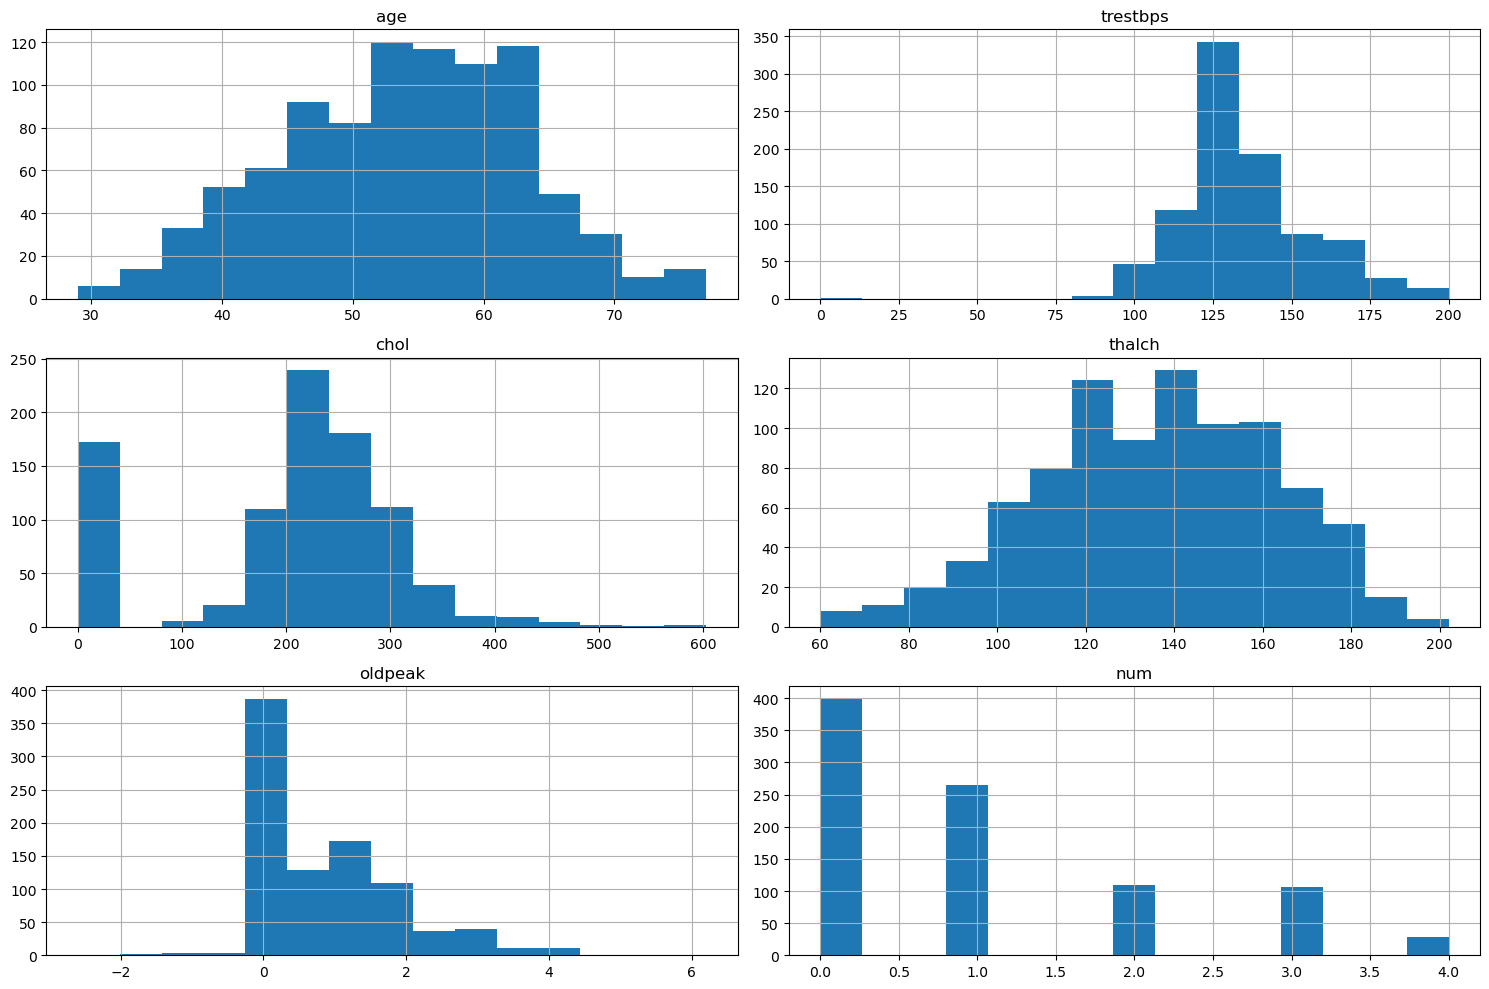

In [13]:
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [14]:
import seaborn as sns

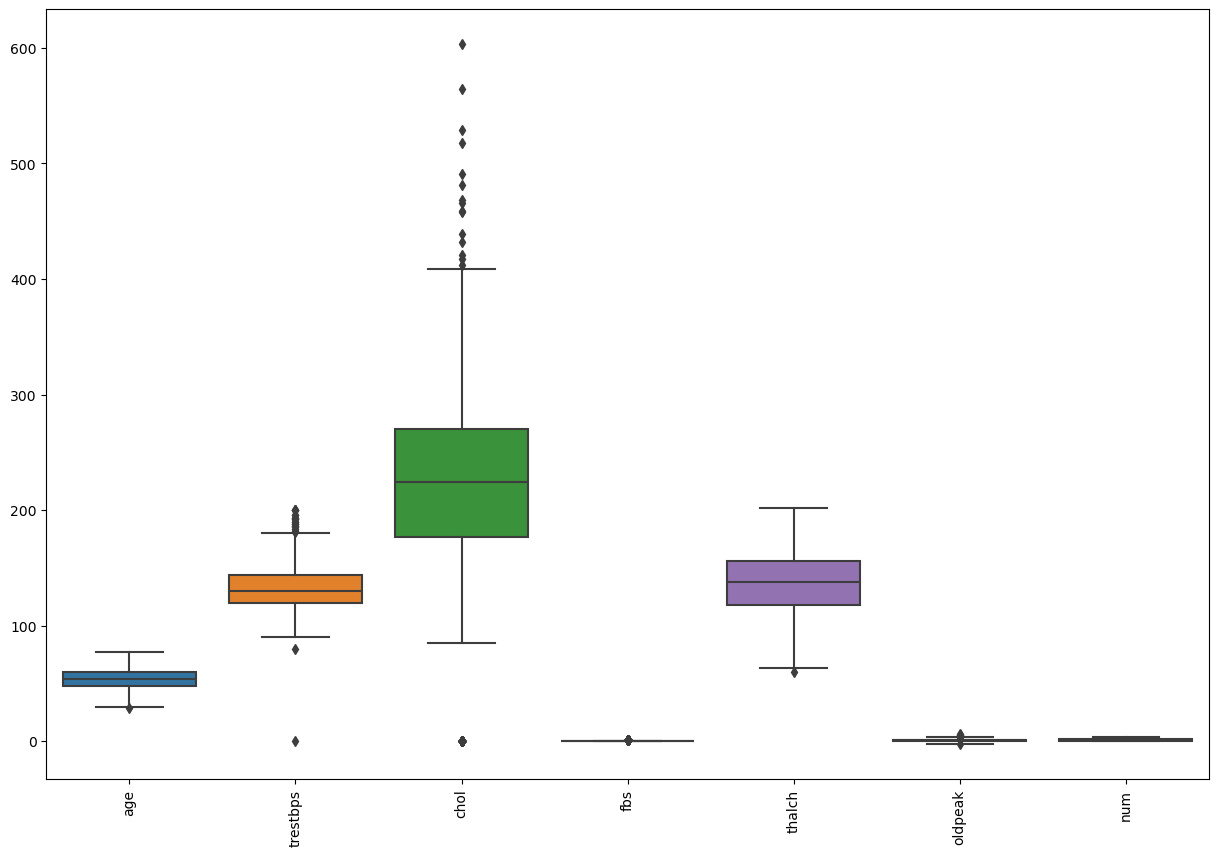

In [15]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1392\1156295686.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


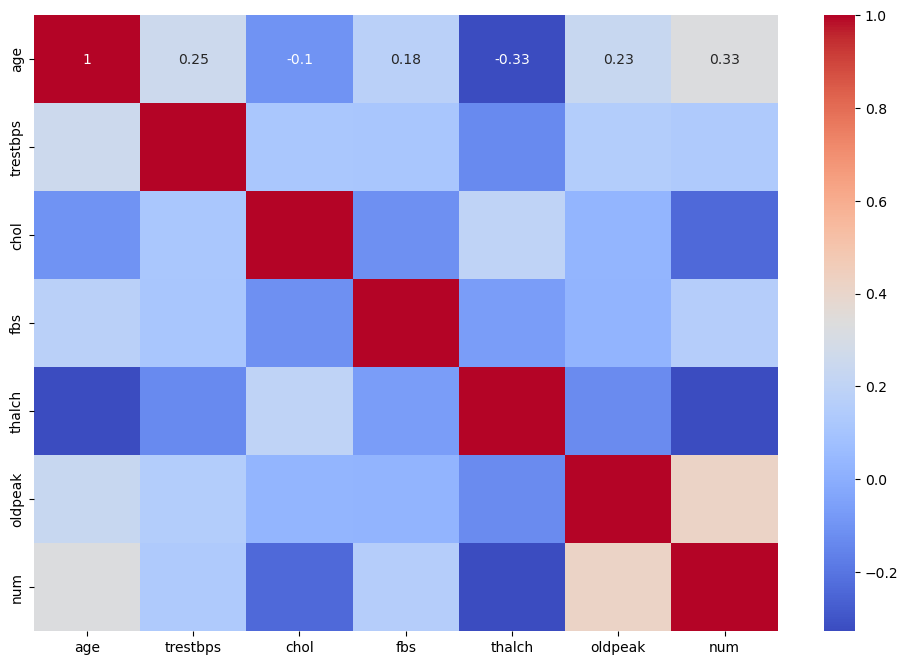

In [16]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [18]:
# Encoding categorical variables
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    df[col] = label_encoders[col].fit_transform(df[col])

In [19]:
# Scaling numerical features
scaler = StandardScaler()
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

In [20]:
numerical_columns

['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

In [21]:
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [22]:
df[numerical_columns]

,age,trestbps,chol,thalch,oldpeak
0,1.006027,0.567394,0.281297,0.524183,1.334996e+00
1,-1.397560,0.076967,0.013526,-0.147705,-8.445938e-01
2,0.350503,0.322181,-0.084656,0.449529,-4.655347e-01
3,-0.195767,-0.756760,-0.138211,2.017268,-8.445938e-01
4,0.350503,-1.149102,-0.004325,-0.371668,5.768777e-01
...,...,...,...,...,...
903,-0.086513,-0.413461,-1.798388,-0.595631,5.768777e-01
904,0.896773,1.597292,-0.281021,-0.595631,1.998349e+00
905,0.241249,1.793463,-1.798388,-0.483649,1.524525e+00
906,0.241249,0.518352,0.058155,-1.155538,-1.052100e-16


In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006027,1,3,0.567394,0.281297,1,0,0.524183,0,1.334996,0,0,0
1,-1.397560,1,1,0.076967,0.013526,0,1,-0.147705,0,-0.844594,1,0,0
2,0.350503,1,0,0.322181,-0.084656,0,1,0.449529,0,-0.465535,1,0,0
3,-0.195767,1,3,-0.756760,-0.138211,0,0,2.017268,0,-0.844594,1,0,0
4,0.350503,1,0,-1.149102,-0.004325,0,1,-0.371668,1,0.576878,1,0,0


In [24]:
from sklearn.model_selection import train_test_split


In [25]:
X = df.drop('num', axis=1)
y = df['num']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
84,-1.288306,1,1,-0.658674,0.834689,0,1,0.972109,0,-8.445938e-01,2,1
10,-2.599354,0,3,1.793463,0.316999,0,2,1.270726,0,-8.445938e-01,0,0
617,2.207820,1,2,0.322181,0.316999,1,1,-1.566136,0,-8.445938e-01,2,2
250,-1.397560,1,0,-1.443359,-1.798388,0,2,-0.931575,0,-8.445938e-01,1,1
869,-0.523529,1,2,0.175052,-0.530941,0,1,-2.536642,0,-1.052100e-16,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.006027,0,2,0.076967,0.450885,0,0,1.345380,0,-8.445938e-01,2,1
270,-1.834576,0,1,-0.658674,0.522290,0,1,-0.222360,0,-8.445938e-01,0,0
860,-0.632783,1,0,0.322181,1.539818,0,1,0.860127,1,5.768777e-01,2,0
435,0.350503,1,1,1.008779,0.272371,0,0,1.046763,0,-8.445938e-01,2,1


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [29]:
# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)


In [30]:
# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
# Predictions
y_pred = dt_model.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred)

0.510989010989011

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [35]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, precision, recall, f1, conf_matrix

(0.510989010989011,
 0.5044752349100174,
 0.510989010989011,
 0.5075206052699242,
 array([[66, 13,  5,  4,  1],
        [20, 17,  6,  5,  0],
        [ 3,  4,  7,  6,  2],
        [ 3,  8,  1,  3,  2],
        [ 0,  3,  3,  0,  0]], dtype=int64))

In [36]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.510989010989011
Precision: 0.5044752349100174
Recall: 0.510989010989011
F1-score: 0.5075206052699242


In [37]:
y_pred_proba = dt_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')
roc_auc

0.5737990133489556

In [38]:
#Hyperparameter Tuning


In [39]:
# Define the parameter grid


In [40]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [41]:
# Initialize the grid search
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [42]:
# Perform the grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [43]:
# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(max_depth=3, random_state=42)

In [44]:
# Predictions with the best model
y_pred_best = best_model.predict(X_test)


In [47]:
# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
best_params, accuracy_best, precision_best, recall_best, f1_best, conf_matrix_best


({'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2},
 0.5714285714285714,
 0.4800292813784487,
 0.5714285714285714,
 0.521714462059831,
 array([[76, 10,  0,  3,  0],
        [19, 24,  0,  5,  0],
        [ 5, 12,  0,  5,  0],
        [ 5,  8,  0,  4,  0],
        [ 2,  2,  0,  2,  0]], dtype=int64))

In [49]:
#Model Evaluation and Analysis


In [50]:
from sklearn.tree import plot_tree


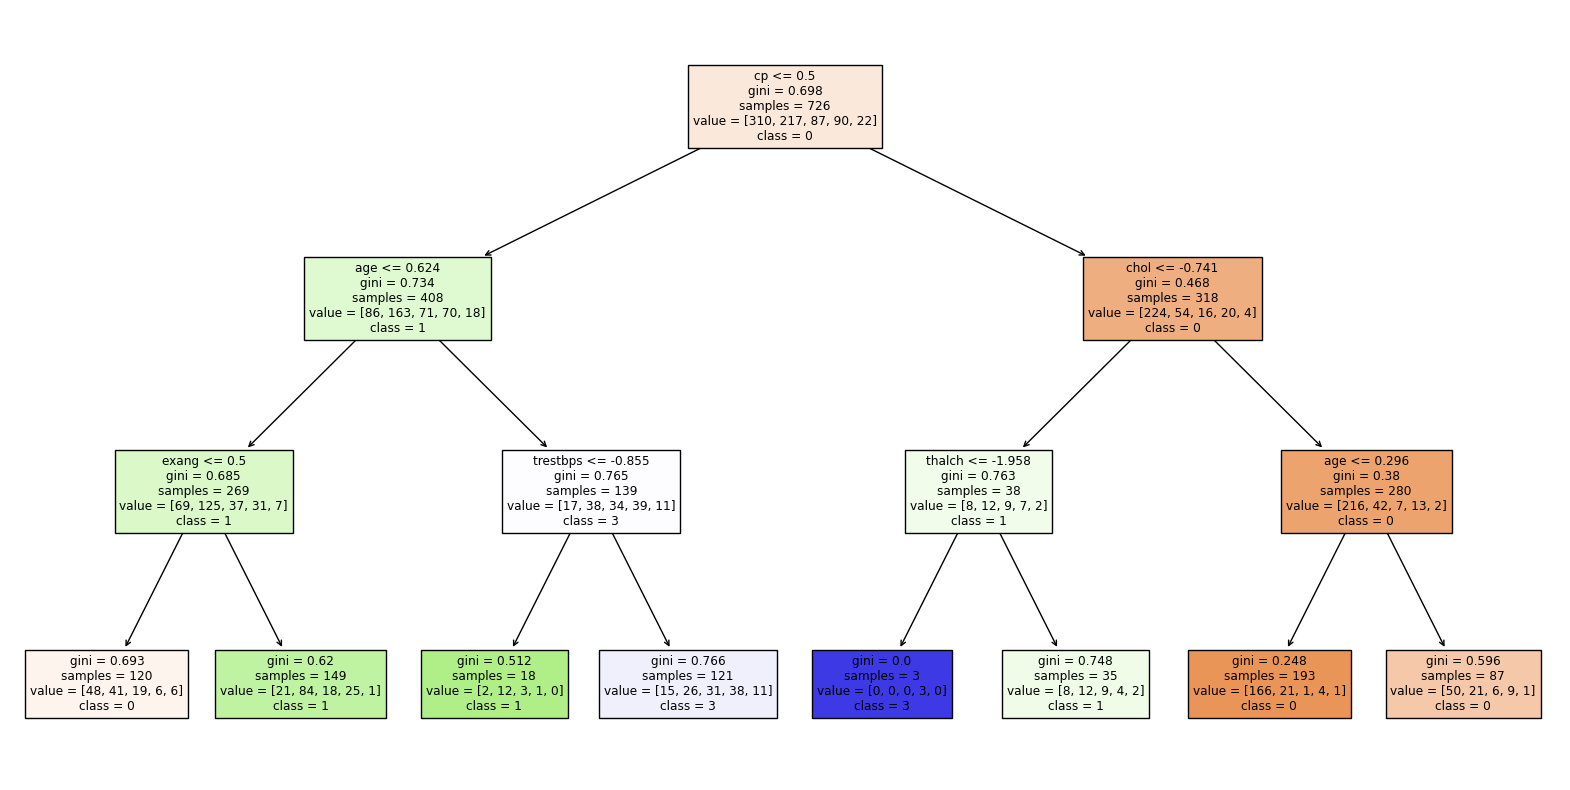

In [51]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, class_names=['0', '1', '2', '3', '4'], filled=True)
plt.show()